## Loan Default Prediction Dataset

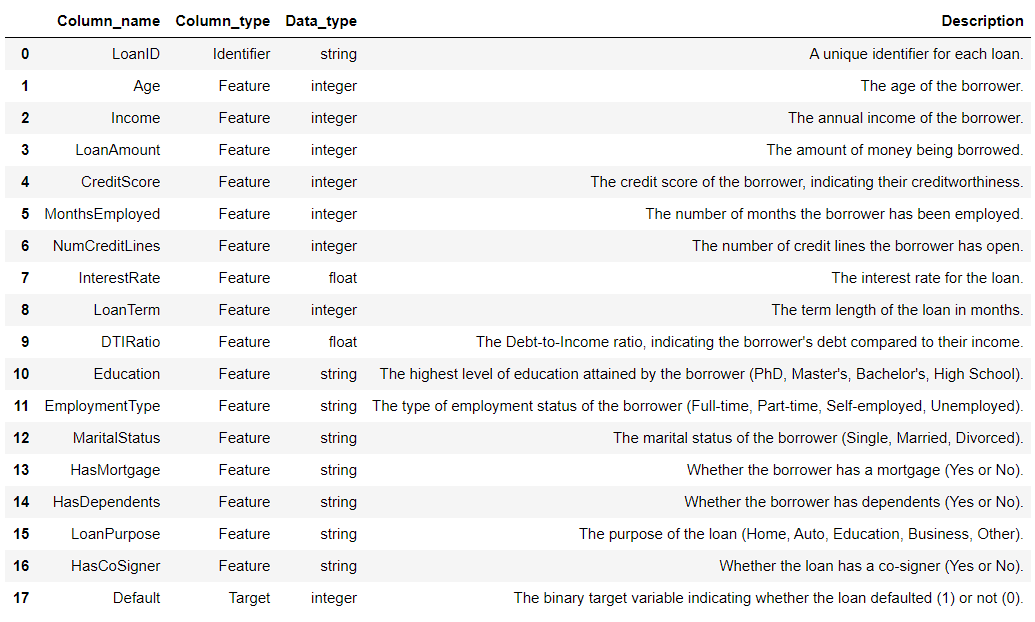

## This dataset has been taken from Coursera's Loan Default Prediction Challenge and will provide you the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. The dataset contains 255,347 rows and 18 columns in total.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## loading the datasets  from csv file
dataset = pd.read_csv("datasets/Loan_default.csv")
df = dataset.copy()

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Loan_Status / Default
Type: Categorical (Yes/No or 1/0)
Meaning:
1 / Yes → Customer will repay loan

## EDA

In [4]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

## removed LoanID, Education, and MaritalStatus to improve model quality, interpretability, and real-world robustness

In [5]:
df.drop(['LoanID', 'Education','MaritalStatus'] , axis= 1, inplace=True)

In [6]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Full-time,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Full-time,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Unemployed,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,Full-time,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Unemployed,No,Yes,Auto,No,0


In [7]:
df.shape

(255347, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   EmploymentType  255347 non-null  object 
 10  HasMortgage     255347 non-null  object 
 11  HasDependents   255347 non-null  object 
 12  LoanPurpose     255347 non-null  object 
 13  HasCoSigner     255347 non-null  object 
 14  Default         255347 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 29.2+ MB


In [9]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
EmploymentType    0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
## In our dataset there is no null values 

In [11]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [12]:
## this are the statistical valuess of our numerical features 

In [13]:
df["EmploymentType"].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [14]:
df["LoanPurpose"].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

In [15]:
## In this we have more than two type of values so we have to do OHE insted of lable or any other encodeing 

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
list1 =['LoanPurpose' , 'EmploymentType']
data = encoder.fit_transform(df[list1]).toarray()
data_df = pd.DataFrame(data , columns=encoder.get_feature_names_out())

In [17]:
df = pd.concat([df,data_df] , axis=1)

In [18]:
df.drop(['LoanPurpose' , 'EmploymentType'] , axis=1, inplace=True)

In [19]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Default,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed
0,56,85994,50587,520,80,4,15.23,36,0.44,Yes,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,69,50432,124440,458,15,1,4.81,60,0.68,No,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,46,84208,129188,451,26,3,21.17,24,0.31,Yes,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,31713,44799,743,0,3,7.07,24,0.23,No,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,60,20437,9139,633,8,4,6.51,48,0.73,No,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  object 
 10  HasDependents                 255347 non-null  object 
 11  HasCoSigner                   255347 non-null  object 
 12  Default                       255347 non-nul

In [21]:
binary_mapping ={ "Yes" :1 ,"No":0}
col = ['HasMortgage' , 'HasDependents' , 'HasCoSigner']
df[col] =df[col].replace(binary_mapping)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_396\1020611929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] =df[col].replace(binary_mapping)


In [22]:
df[col]

,HasMortgage,HasDependents,HasCoSigner
0,1,1,1
1,0,0,1
2,1,1,0
3,0,0,0
4,0,1,0
...,...,...,...
255342,0,0,0
255343,0,0,0
255344,1,1,1
255345,1,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  int64  
 10  HasDependents                 255347 non-null  int64  
 11  HasCoSigner                   255347 non-null  int64  
 12  Default                       255347 non-nul

In [24]:
## now one more work left convert float into int for those have binary data to save memory 
colu = ['LoanPurpose_Auto','LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home','LoanPurpose_Other', 'EmploymentType_Full-time','EmploymentType_Part-time', 'EmploymentType_Self-employed','EmploymentType_Unemployed']
df[colu] = df[colu].astype('int')

In [25]:
df.dtypes

Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
Default                           int64
LoanPurpose_Auto                  int64
LoanPurpose_Business              int64
LoanPurpose_Education             int64
LoanPurpose_Home                  int64
LoanPurpose_Other                 int64
EmploymentType_Full-time          int64
EmploymentType_Part-time          int64
EmploymentType_Self-employed      int64
EmploymentType_Unemployed         int64
dtype: object

In [26]:
## we are done with data cleaning process now time for visualize the data

In [27]:
df['Default'].value_counts(normalize=True) ## WE HANDLE THIS DUERING MODEL TRAINING OF LOGISTIC AND SVM 

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

<Axes: xlabel='Default', ylabel='LoanAmount'>

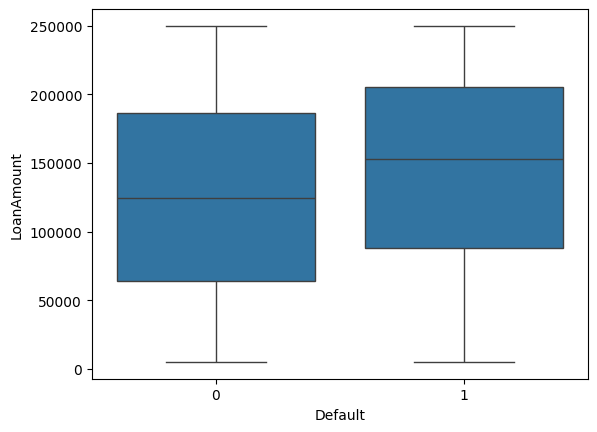

In [28]:
## PLOATING A BOX PLOT TO SHOW THE RELLATION OF LOAN STATUS AND LOAN AMOUNT
sns.boxplot(x='Default', y='LoanAmount', data=df)


# High loan amount → higher default risk

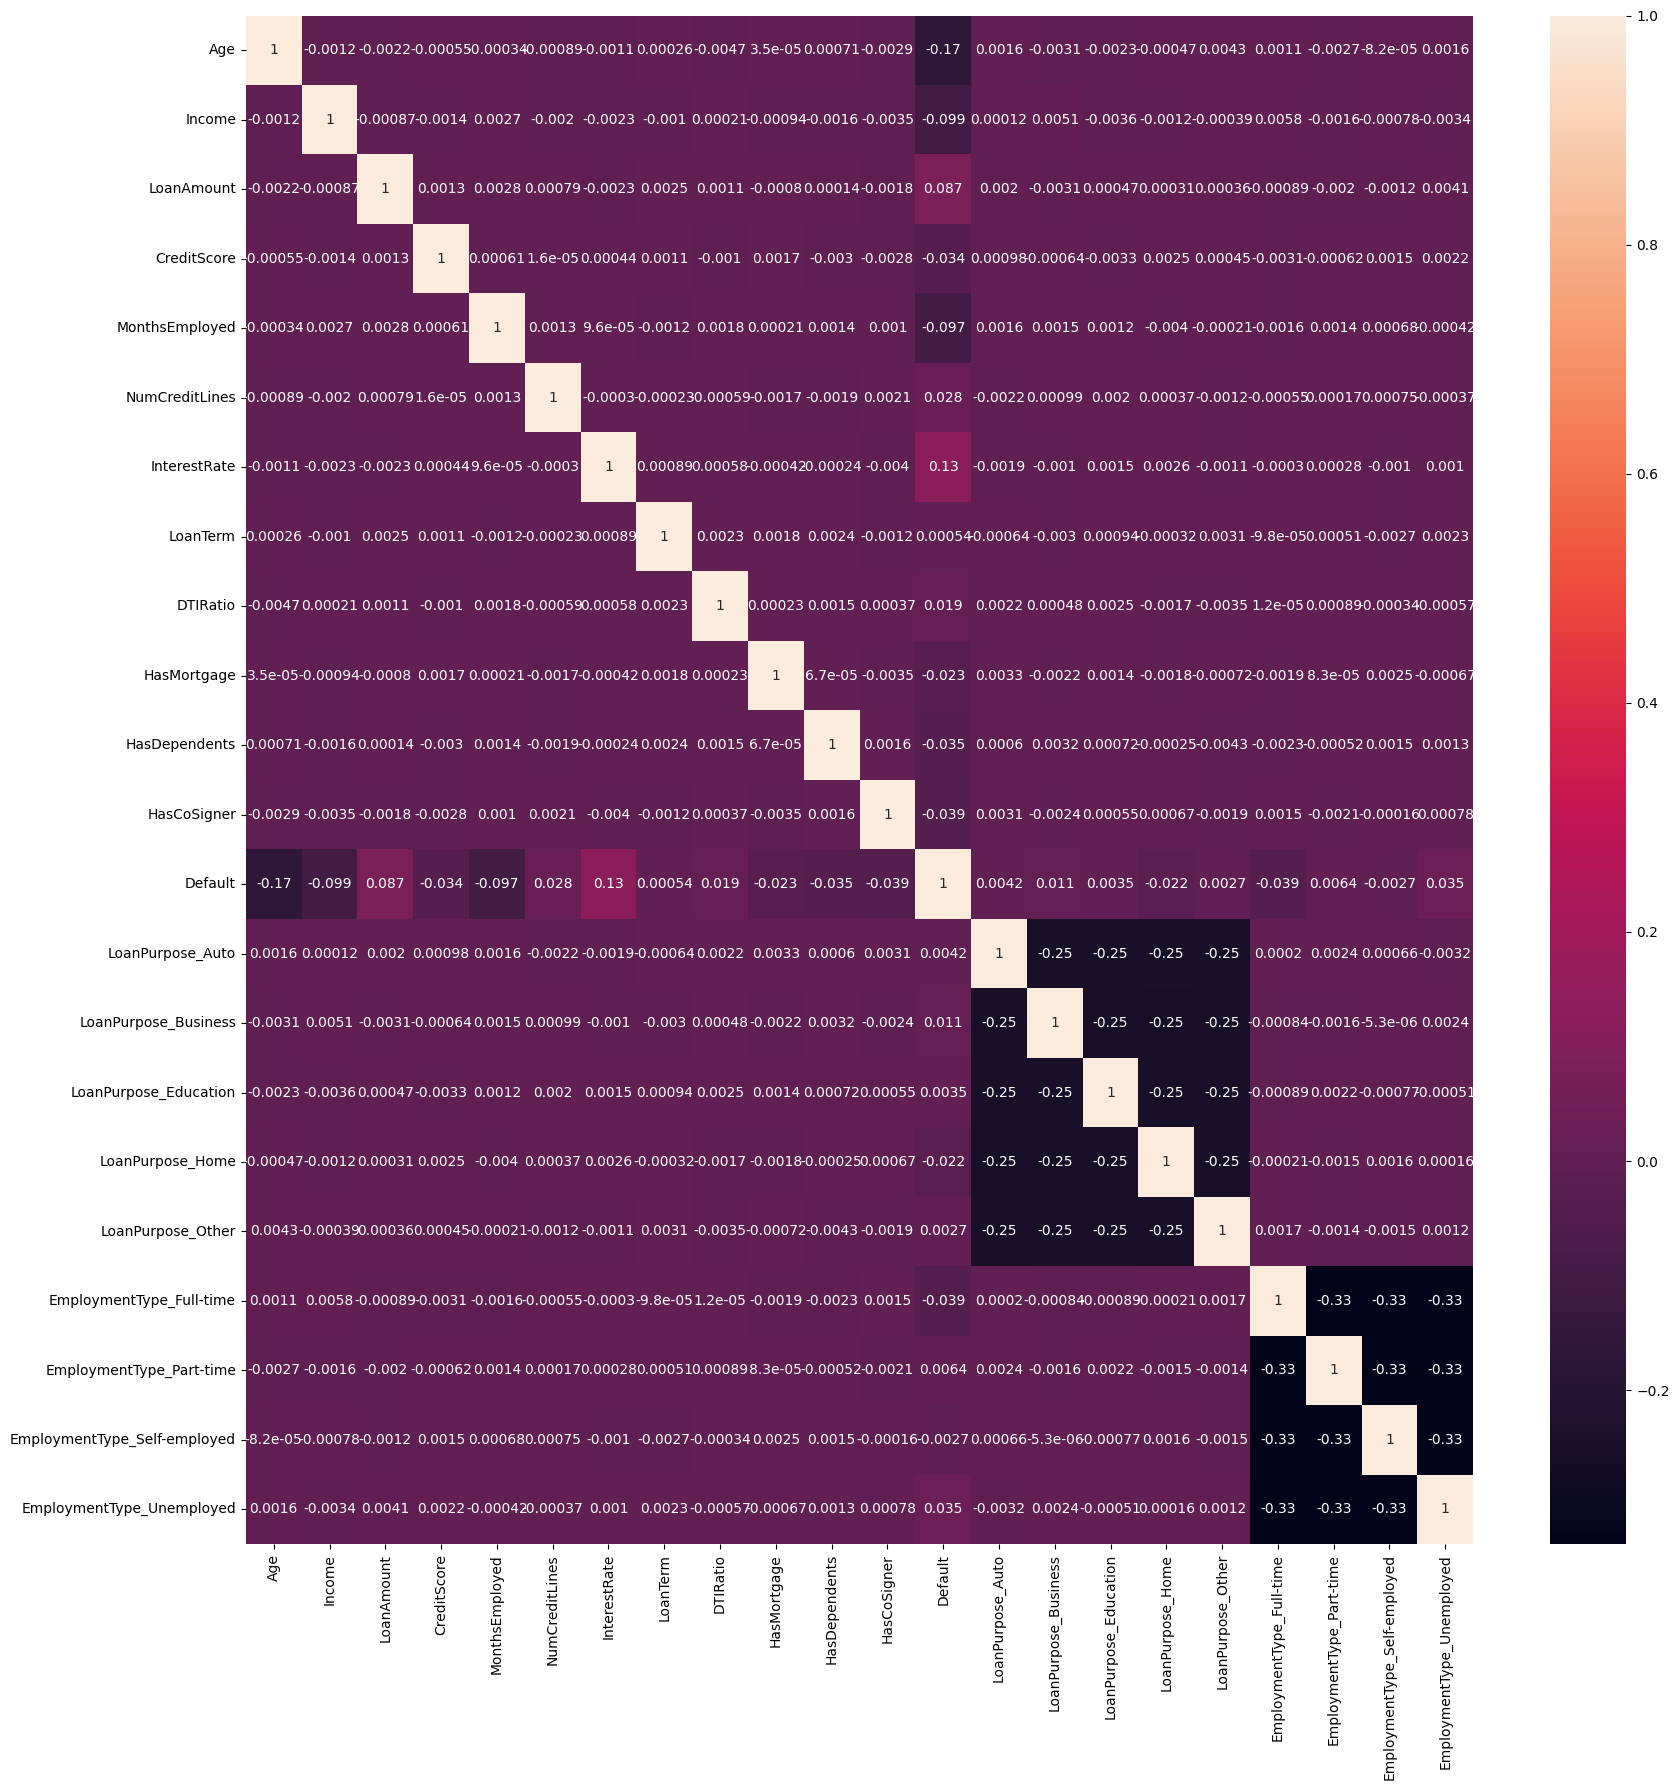

In [29]:
# cheaking the correlatin on data 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

In [30]:
colm = df.columns

In [31]:
colm

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'EmploymentType_Full-time',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed'],
      dtype='object')

In [32]:
df.to_csv("clean_default.csv")